# Homework: Data Visualization
## Edoardo Borriello 750051



# <p>  1. Checking if the dataset has missing values and correcting them</p>

<p><b> 1)</b> First of all I have imported the necessary libraries to carry out all the calculations, and the dataset from which we'll take all the data for our research</p>

<b>2)</b> After the import i checked if there were missing values.

<b>3)</b> Then i changed into floats or integers all those values that were interpreted as a string to make the next steps of the work better.

<p><b>4)</b> Finally since there were several missing values, we will replace them: for two values (Sunshine hour of Geneva and Pollution index of Fukuoka) i putted their true value, while for the Annual avg. hours worked column, since it has a lot of missing value, i chose to calculate and put the average of the values in the same column.</p>
<p></p>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('../Data Visualization/healthy_lifestyle_city_2021.csv')
df.head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53


In [31]:
df.replace('-',np.NaN,inplace=True)
missing_value = df.isnull()
missing_value.head()
for column in missing_value.columns.values.tolist():
    print(column)
    print(missing_value[column].value_counts())
    print(" ")

City
False    44
Name: City, dtype: int64
 
Rank
False    44
Name: Rank, dtype: int64
 
Sunshine hours(City)
False    43
True      1
Name: Sunshine hours(City), dtype: int64
 
Cost of a bottle of water(City)
False    44
Name: Cost of a bottle of water(City), dtype: int64
 
Obesity levels(Country)
False    44
Name: Obesity levels(Country), dtype: int64
 
Life expectancy(years) (Country)
False    44
Name: Life expectancy(years) (Country), dtype: int64
 
Pollution(Index score) (City)
False    43
True      1
Name: Pollution(Index score) (City), dtype: int64
 
Annual avg. hours worked
False    33
True     11
Name: Annual avg. hours worked, dtype: int64
 
Happiness levels(Country)
False    44
Name: Happiness levels(Country), dtype: int64
 
Outdoor activities(City)
False    44
Name: Outdoor activities(City), dtype: int64
 
Number of take out places(City)
False    44
Name: Number of take out places(City), dtype: int64
 
Cost of a monthly gym membership(City)
False    44
Name: Cost of a monthly

In [32]:
df.at[19,'Sunshine hours(City)']=1830
df.at[6,'Pollution(Index score) (City)']=62.27

In [33]:
df = df.astype({"Annual avg. hours worked": float , "Sunshine hours(City)": int , "Pollution(Index score) (City)": float })

df = df.copy()
df['Cost of a bottle of water(City)'] = df['Cost of a bottle of water(City)'].apply(lambda x: x.replace('£', '').replace(',', '')
                                if isinstance(x, str) else x).astype(float)

df['Cost of a monthly gym membership(City)'] = df['Cost of a monthly gym membership(City)'].apply(lambda x: x.replace('£', '').replace(',', '')
                                if isinstance(x, str) else x).astype(float)

df['Obesity levels(Country)'] = df['Obesity levels(Country)'].apply(lambda x: x.replace('%', '').replace(',', '')
                                if isinstance(x, str) else x).astype(float)

In [34]:
df = df.astype({"Annual avg. hours worked": float , "Sunshine hours(City)": int })
mean=df.loc[: ,['Annual avg. hours worked']].mean(skipna=True).astype(int)
print(mean)

Annual avg. hours worked    1672
dtype: int32


In [35]:
df = df.fillna(mean['Annual avg. hours worked'])
df

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,1.92,20.4,81.2,30.93,1434.0,7.44,422,1048,34.90
1,Sydney,2,2636,1.48,29.0,82.1,26.86,1712.0,7.22,406,1103,41.66
2,Vienna,3,1884,1.94,20.1,81.0,17.33,1501.0,7.29,132,1008,25.74
3,Stockholm,4,1821,1.72,20.6,81.8,19.63,1452.0,7.35,129,598,37.31
4,Copenhagen,5,1630,2.19,19.7,79.8,21.24,1380.0,7.64,154,523,32.53
5,Helsinki,6,1662,1.60,22.2,80.4,13.08,1540.0,7.80,113,309,35.23
6,Fukuoka,7,2769,0.78,4.3,83.2,62.27,1644.0,5.87,35,539,55.87
7,Berlin,8,1626,1.55,22.3,80.6,39.41,1386.0,7.07,254,1729,26.11
8,Barcelona,9,2591,1.19,23.8,82.2,65.19,1686.0,6.40,585,2344,37.80
9,Vancouver,10,1938,1.08,29.4,81.7,24.26,1670.0,7.23,218,788,31.04


# <p>2. Plotting a bar chart describing the Happiness levels for each city</p>

<b>1)</b> To set the barplot, first I chose the size of the graph and then I set the palette that will be displayed inside, specifying that, unlike all the cities that will be gray, Milan (the only italian city in the dataset) will be highlighted in dark blue.

<p><b> 2)</b> Finally, due to the large number of cities on the x-axis, to avoid too much confusion, I tilted the indices to make the graph clearer and renamed the axes "Cities" and "Happiness level".</p>
<p></p>

Text(0.5, 0, 'Cities')

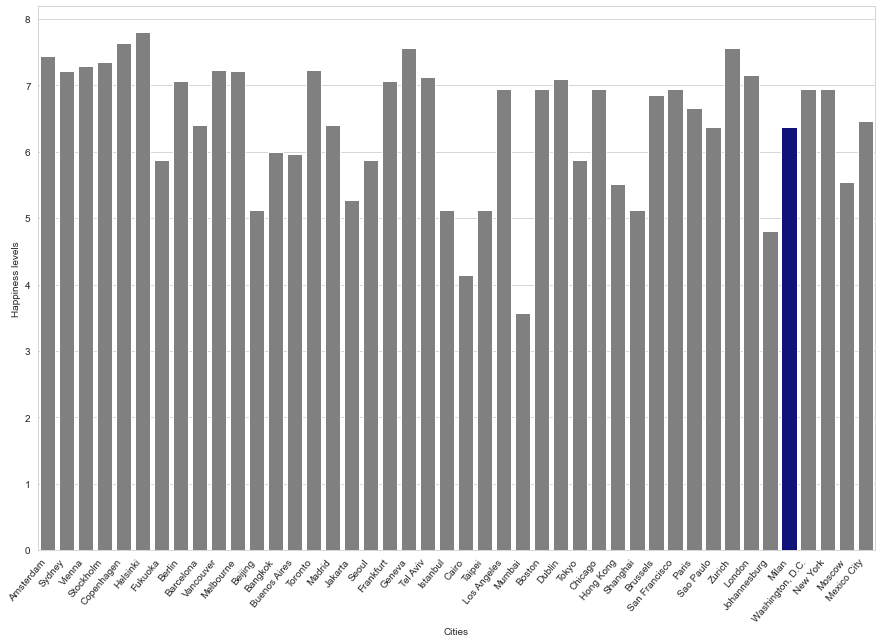

In [10]:
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")
color = ['darkblue' if x=='Milan' else 'gray' for x in df['City']]
g = sns.barplot(x="City", y="Happiness levels(Country)", data=df, palette=color)
g.set_xticklabels(g.get_xticklabels(), rotation=50, horizontalalignment='right')
g.set_ylabel('Happiness levels')
g.set_xlabel('Cities')


# <p>3. Plotting the correlation between any two pair of variables as a heatmap
First of all, as for the barplot, I chose a base palette and i changed also it's parameters a bit to make it better for the correlation. Subsequently I set the values from -1 to 1 and I have inserted them inside the graph. 
    <p><b><u> Looking at the values we find that the top 3 correlations are:</b>
<p><b> 1)</b> Happines level (Country), Cost of a bottle of water (City)
<p><b> 2)</b> Happines level (Country), Life expectancy (years)(Country)
<p><b> 3)</b> Life expectancy (years)(Country), Cost of a bottle of water (City)</p>
<p><b><u> On the other hand, the worst three ones are:</b>
<p><b>1)</b> Happines level (Country), Pollution (Index score)(City)
<p><b>2)</b> Pollution (Index score)(City), Cost of a bottle of water (City)
<p><b>3)</b> Pollution (Index score)(City), Life expectancy (years)(Country)
<p> As we can see, the results in some cases look a bit strange. For example the best correlation, Happines level and Cost of a bottle of water, it is not a very important data and it doesn't add much that is significant to our research, while for one of the worst correlation, Pollution (Index score)(City) and Life expectancy (years)(Country), I would have expected a higher value. Anyway i think that the majority af correlation are reliable and could be taken in consideration for an ipotetical research. 


<AxesSubplot:>

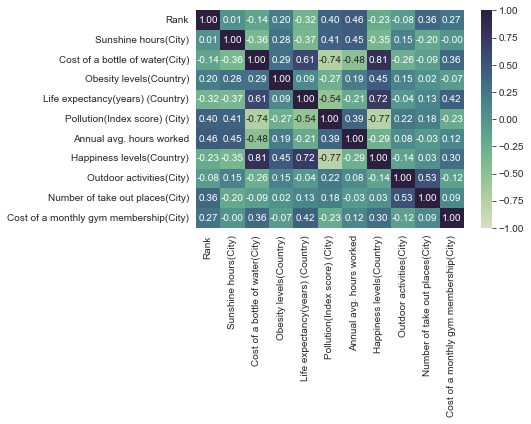

In [59]:
color = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, fmt='2.2f', cmap = color)

# <p>4. Dividing the cities into 6 groups based on the first letter of their name
<p><b>1)</b> First I set the dataset in alphabetical order.</p>
<p><b>2)</b> Then I divided the dataset in 6 part by grouping the cities in alphabetical order as: A-D, E-H, I-L, M-P, Q-U, V-Z.
<p><b>3)</b> Furthermore, I also created another 6 dataframes in which I put the sum of the "Number of take out places" data of the dataframe above, which will be usefull to form the barplot.
<p></p>

In [38]:
df0 = df.sort_values('City', ignore_index=True)
df0.head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,1.92,20.4,81.2,30.93,1434.0,7.44,422,1048,34.90
1,Bangkok,13,2624,0.22,10.0,74.1,76.64,1672.0,5.99,377,1796,50.03
2,Barcelona,9,2591,1.19,23.8,82.2,65.19,1686.0,6.40,585,2344,37.80
3,Beijing,12,2671,0.26,6.2,75.4,85.43,1672.0,5.12,223,261,38.62
4,Berlin,8,1626,1.55,22.3,80.6,39.41,1386.0,7.07,254,1729,26.11


In [39]:
dfa = df0.loc[ :11, ['City','Number of take out places(City)' ]]
dfa

,City,Number of take out places(City)
0,Amsterdam,1048
1,Bangkok,1796
2,Barcelona,2344
3,Beijing,261
4,Berlin,1729
5,Boston,588
6,Brussels,988
7,Buenos Aires,1435
8,Cairo,250
9,Chicago,1320


In [40]:
df1 = dfa.sum()
df1

City                               AmsterdamBangkokBarcelonaBeijingBerlinBostonBr...
Number of take out places(City)                                                12941
dtype: object

In [41]:
dfb = df0.loc[11:16, ['City', 'Number of take out places(City)']]
dfb.head()

,City,Number of take out places(City)
11,Dublin,659
12,Frankfurt,551
13,Fukuoka,539
14,Geneva,444
15,Helsinki,309


In [42]:
df2 = dfb.sum()
df2

City                               DublinFrankfurtFukuokaGenevaHelsinkiHong Kong
Number of take out places(City)                                             3759
dtype: object

In [43]:
dfc = df0.loc[16:21, ['City', 'Number of take out places(City)']]
dfc.head()

,City,Number of take out places(City)
16,Hong Kong,1257
17,Istanbul,934
18,Jakarta,833
19,Johannesburg,492
20,London,6417


In [44]:
df3 = dfc.sum()
df3

City                               Hong KongIstanbulJakartaJohannesburgLondonLos ...
Number of take out places(City)                                                11372
dtype: object

In [45]:
dfd = df0.loc[21:29, ['City', 'Number of take out places(City)']]
dfd.head()

,City,Number of take out places(City)
21,Los Angeles,1439
22,Madrid,2491
23,Melbourne,813
24,Mexico City,1313
25,Milan,2396


In [46]:
df4 = dfd.sum()
df4

City                               Los AngelesMadridMelbourneMexico CityMilanMosc...
Number of take out places(City)                                                20285
dtype: object

In [47]:
dfe = df0.loc[29:39, ['City', 'Number of take out places(City)']]
dfe.head()

,City,Number of take out places(City)
29,Paris,4363
30,San Francisco,1031
31,Sao Paulo,3355
32,Seoul,389
33,Shanghai,346


In [48]:
df5 = dfe.sum()
df5

City                               ParisSan FranciscoSao PauloSeoulShanghaiStockh...
Number of take out places(City)                                                19780
dtype: object

In [49]:
dff = df0.loc[39:43, ['City', 'Number of take out places(City)']]
dff.head()

,City,Number of take out places(City)
39,Toronto,1656
40,Vancouver,788
41,Vienna,1008
42,"Washington, D.C.",744
43,Zurich,538


In [50]:
df6 = dff.sum()
df6

City                               TorontoVancouverViennaWashington, D.C.Zurich
Number of take out places(City)                                            4734
dtype: object

# <p>5. Creating the dataset and plotting the barplot
<p>Here to create the dataset I first set up a dictionary and set two columns: the first containing the sums of the "Number of take out places" called "Total number of take out places" and the second with the respective dataframe called "Dataframes".</p>
<p>As for the previous barplot, first I set the size. For the color of the bars, on the other hand, I chose sea green, exept for the one with grater value, which i colored fire brick.
    <p>

In [51]:
dic = {'Total number of take out places': [df1['Number of take out places(City)'], df2['Number of take out places(City)'], df3['Number of take out places(City)'], df4['Number of take out places(City)'], df5['Number of take out places(City)'], df6['Number of take out places(City)']], 'Dataframes': ['A-D', 'E-H', 'I-L', 'M-P', 'Q-U', 'V-Z']}
dataf = pd.DataFrame(dic)
dataf

,Total number of take out places,Dataframes
0,12941,A-D
1,3759,E-H
2,11372,I-L
3,20285,M-P
4,19780,Q-U
5,4734,V-Z


Text(0, 0.5, 'Total number of take out places')

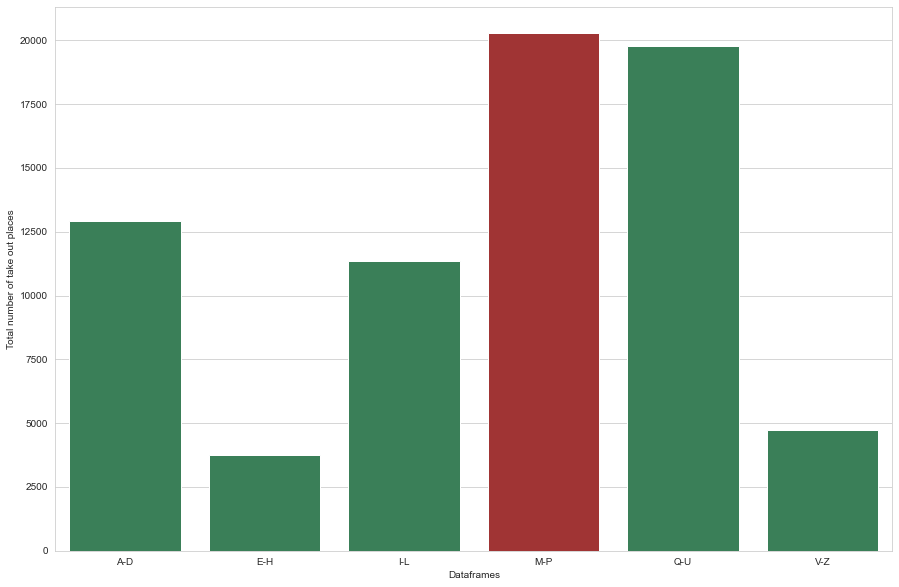

In [52]:
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")
color = ['firebrick' if x=='M-P' else 'seagreen' for x in dataf['Dataframes']]
g = sns.barplot(x="Dataframes", y="Total number of take out places", data=dataf, palette=color)
g.set_ylabel('Total number of take out places')

# <p> 6. Plotting the graphics in a specific order
 <p>First I chose the size of the figure and the number of slots where to put the plots.
<p>Then I created the 8 empty graphs, giving them the required shape, and only later I filled them with the detailed plots which are:
<p><b>1)</b> A scatter plot between Life expectancy and Obesity levels
<p><b>2)</b> A barplot that highlights the Life expectancy data in the cities present in the dataset
<p><b>3)</b> A heatmap that correlates: Pollution, annual avg. hours worked, happiness level, outdor activities and number of take out places
<p><b>4)</b> The fourth plot is the same as the first, with the difference that only cities with a life expectancy greater than 75 are taken into consideration
<p><b>5)</b> A pie chart that highlights the percentage of number of take out places for the different groups of cities, sorted by alphabetical order, created in the previous exercise
<p><b>6)</b> A scatterplot between Sunshine hours and Outdoor activities
<p><b>7)</b> A scatterplot with the same indices of the first and fourth, but only cities with life expectancy < 80 and Obesity levels < 25% are taken into consideration
<p><b>8)</b> A histogram showing the number of the happiness level (also with KDE) in the cities present in the dataset
  <p></p>

<AxesSubplot:title={'center':'Happiness levels'}, xlabel='Happiness levels(Country)', ylabel='Count'>

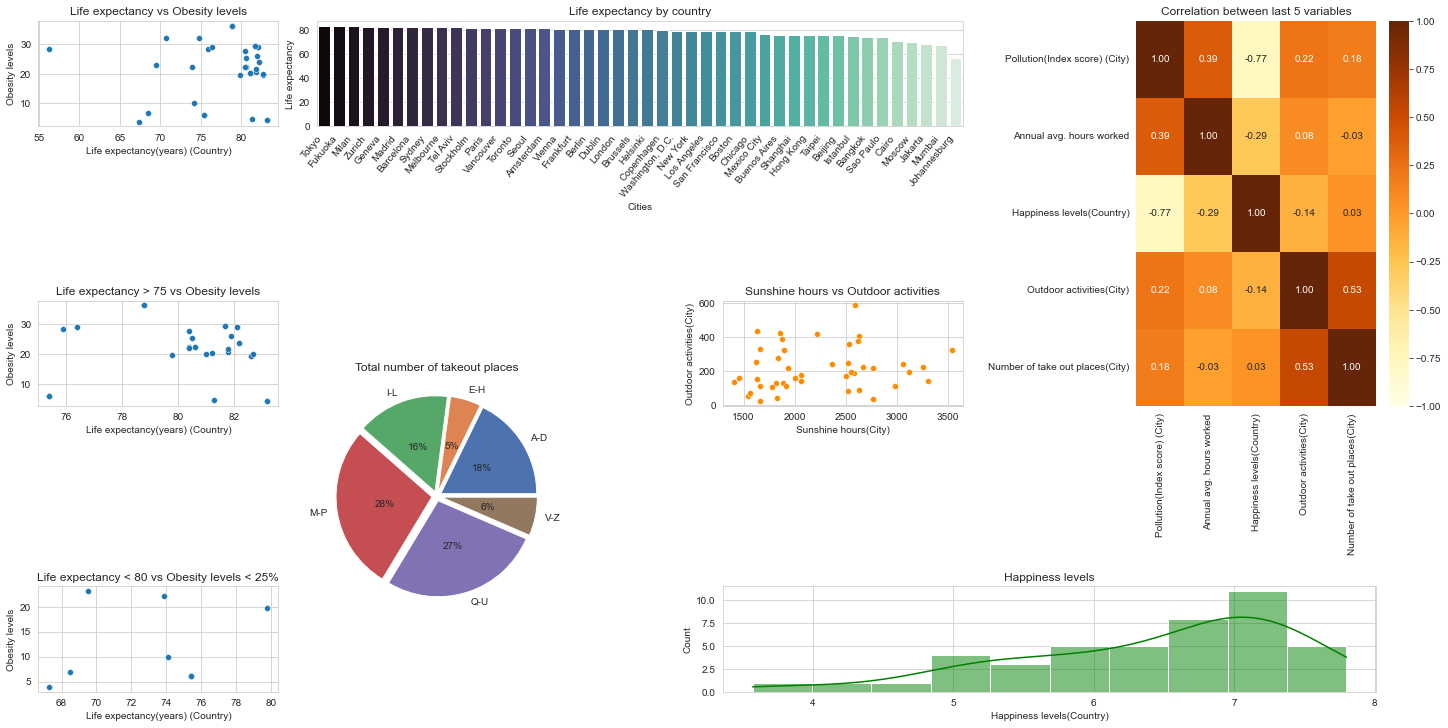

In [72]:
fig = plt.figure(figsize=(20,10),constrained_layout=True) 
spec = fig.add_gridspec(3, 4)


fig_ax1 = fig.add_subplot(spec[0, 0])
fig_ax1.set_title('Life expectancy vs Obesity levels')
sns.scatterplot(x='Life expectancy(years) (Country)', y='Obesity levels(Country)', data=df, palette = 'cubehelix')
fig_ax1.set_ylabel('Obesity levels')

fig_ax2 = fig.add_subplot(spec[0, 1:3])
fig_ax2.set_title('Life expectancy by country')
df_sorted= df.sort_values('Life expectancy(years) (Country)',ascending=False)
f = sns.barplot(data = df_sorted, x = "City", y= "Life expectancy(years) (Country)", palette = 'mako')
f.set_xticklabels(f.get_xticklabels(), rotation=50, horizontalalignment='right')
fig_ax2.set_ylabel('Life expectancy')
fig_ax2.set_xlabel('Cities')

fig_ax3 = fig.add_subplot(spec[0:-1, 3])
fig_ax3.set_title('Correlation between last 5 variables')
sns.heatmap(df.iloc[:, 6:11].corr(), vmin=-1, vmax=1, annot=True, fmt='2.2f', cmap = 'YlOrBr', xticklabels = True, yticklabels = True)

fig_ax4 = fig.add_subplot(spec[1, 0])
fig_ax4.set_title('Life expectancy > 75 vs Obesity levels')
sns.scatterplot(x='Life expectancy(years) (Country)', y='Obesity levels(Country)', data=df[df['Life expectancy(years) (Country)'] > 75], palette = 'cubehelix')
fig_ax4.set_ylabel('Obesity levels')

fig_ax5 = fig.add_subplot(spec[1:3, 1:2])
fig_ax5.set_title('Total number of takeout places')
dfe = dataf.drop(['Dataframes'], axis = 1) 
colors = sns.color_palette('deep')[0:6]
index=['A-D', 'E-H', 'I-L', 'M-P', 'Q-U', 'V-Z']
plt.pie(dfe['Total number of take out places'] , labels = index , colors = colors , autopct='%.0f%%', explode=[0.05]*6, pctdistance=0.5)

fig_ax6 = fig.add_subplot(spec[1:2, 2])
fig_ax6.set_title('Sunshine hours vs Outdoor activities')
sns.scatterplot(x='Sunshine hours(City)', y='Outdoor activities(City)', data=df, color = 'darkorange')
fig_ax6.set_ylabel('Outdoor activities(City)')

fig_ax7 = fig.add_subplot(spec[2, 0])
fig_ax7.set_title('Life expectancy < 80 vs Obesity levels < 25%')
dfg=df
dfg= dfg[dfg['Life expectancy(years) (Country)'] < 80]
dfg= dfg[dfg["Obesity levels(Country)"] < 25]
sns.scatterplot(x='Life expectancy(years) (Country)', y='Obesity levels(Country)', data=dfg , palette = 'cubehelix')
fig_ax7.set_ylabel('Obesity levels')

fig_ax8 = fig.add_subplot(spec[2, 2:4])
fig_ax8.set_title('Happiness levels')
sns.histplot(data = df, x = "Happiness levels(Country)", bins=10, kde=True, color="green")